In this assignment students need to predict whether a person makes over 50K per year or not from classic adult dataset using XGBoost.

In [1]:
# necessary imports
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import xgboost as xgb
from xgboost import XGBClassifier
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)
test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test' , skiprows = 1, header = None) 
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',  'marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain',  'capital_loss', 'hours_per_week', 'native_country', 'wage_class'] 
train_set.columns = col_labels 
test_set.columns = col_labels

In [2]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Data Set Information: 
Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) &&  (AFNLWGT>1)&& (HRSWK>0)) 

### Attribute Information: 

Listing of attributes: >50K, <=50K. 

age: continuous. 

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov,  Local-gov, State-gov, Without-pay, Never-worked. 

fnlwgt: continuous. 

education: Bachelors, Some-college, 11th, HS-grad, Prof-school,  Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th,  Doctorate, 5th-6th, Preschool. 

education-num: continuous.

marital-status: Married-civ-spouse, Divorced, Never-married,  Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct,  Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv,  Protective-serv, Armed-Forces. 

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative,  Unmarried. 

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. sex: Female, Male. 

capital-gain: continuous. 

capital-loss: continuous. 

hours-per-week: continuous. 

native-country: United-States, Cambodia, England, Puerto-Rico,  Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan,  Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy,  Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France,  Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia,  Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

### Exploratory Data Analysis and Data Preprocessing

In [3]:
# dimensions of training data
train_set.shape

(32561, 15)

In [4]:
# dimensions of testing data
test_set.shape

(16281, 15)

In [5]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  wage_class      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16281 non-null  int64 
 1   workclass       16281 non-null  object
 2   fnlwgt          16281 non-null  int64 
 3   education       16281 non-null  object
 4   education_num   16281 non-null  int64 
 5   marital_status  16281 non-null  object
 6   occupation      16281 non-null  object
 7   relationship    16281 non-null  object
 8   race            16281 non-null  object
 9   sex             16281 non-null  object
 10  capital_gain    16281 non-null  int64 
 11  capital_loss    16281 non-null  int64 
 12  hours_per_week  16281 non-null  int64 
 13  native_country  16281 non-null  object
 14  wage_class      16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


Combining train and test data for better understanding and preparation.

In [7]:
# concat train and test data
df = pd.concat([train_set,test_set],ignore_index=True)

In [8]:
df.shape

(48842, 15)

Let's replace "?" with NaN values, delete duplicates and map target variable to 0 and 1.

In [9]:
# deleting duplicates
df.drop_duplicates(inplace=True)

# replacing "?" with NaN
df.replace(" ?", np.NaN, inplace=True)

# mapping our target variable to 0 and 1
df.wage_class.replace({' <=50K':0, ' >50K':1, ' <=50K.':0, ' >50K.':1}, inplace=True)

In [10]:
# count of NaN values
df.isna().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     856
wage_class           0
dtype: int64

Deleting all NaN values.

In [11]:
# deleting NaN values
df.dropna(inplace=True)

In [12]:
df.shape

(45194, 15)

Let's create a correlation matrix. Before that we would have to adjust our data for it.

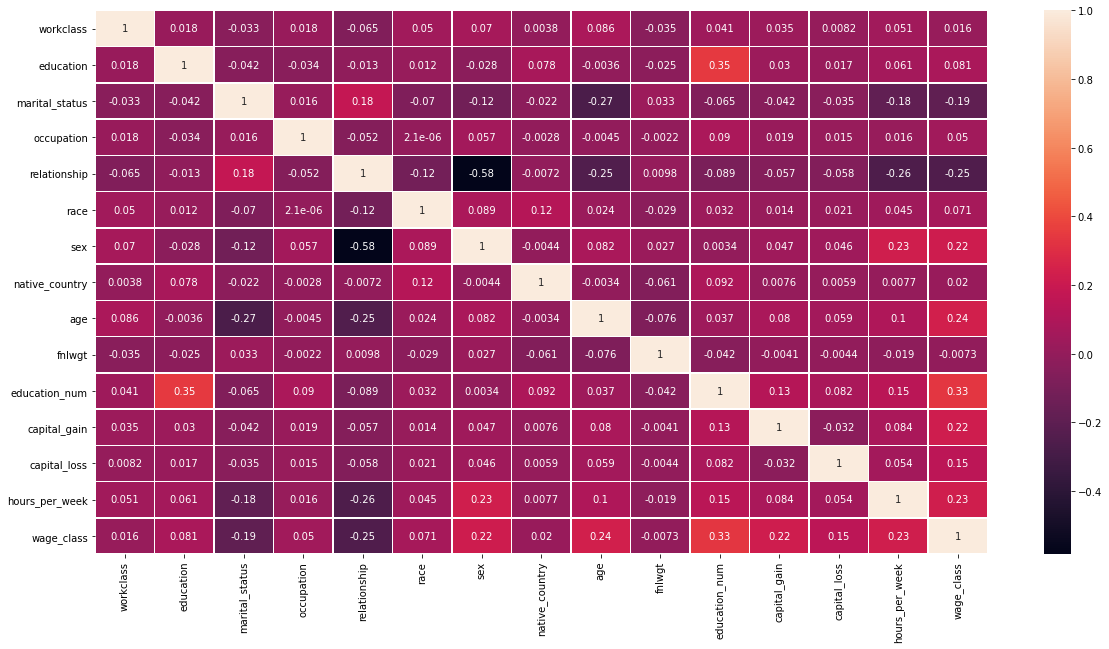

In [13]:
# performing label encoding
categorical = df.select_dtypes(include=['object'])
numerical = df.select_dtypes(exclude=['object'])
label = LabelEncoder()
categorical = categorical.apply(label.fit_transform)
data = pd.concat([categorical, numerical], axis = 1)

# creation of correlation matric
corrMatrix = data.corr()
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(corrMatrix, annot=True,  linewidths=.5, ax=ax)
plt.show()

We can see that sex (0.22), age (0.24), education_num (0.33), capital gain (0.22) and hours per week (0.23) have correlation with our target variable. 

Further we can see that our variables are not heavily correlated with each other except the case of sex and relationship (0.58) along with education and education_num (0.35).

Dropping unecessary columns

In [14]:
data.drop(['fnlwgt', 'education'], axis=1, inplace=True)

### Model Creation and Evaluation

Let's start by splitting our data into training and test sets.

In [15]:
X = data[['age', 'workclass', 'education_num', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
       'hours_per_week', 'native_country']]
y = data['wage_class']

# splitting data into train and test
train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=0.3,random_state=42)

In [16]:
# fit model no training data
model = XGBClassifier(objective='binary:logistic', eval_metric="error")
model.fit(train_x, train_y)

C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='error',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [17]:
# checking training accuracy
model.score(train_x, train_y)

0.8912280701754386

In [18]:
# checking initial test accuracy
model.score(test_x, test_y)

0.8711556899476363

In [19]:
# Now to increae the accuracy of the model, we'll do hyperparameter tuning using grid search

param_grid={
   
    'learning_rate':[1,0.5,0.1,0.01,0.001],
    'max_depth': [3,5,10,20],
    'n_estimators':[10,50,100,200]
    
}

grid= GridSearchCV(XGBClassifier(objective='binary:logistic', eval_metric="error"),param_grid, verbose=3)

In [20]:
#grid.fit(train_x,train_y)

In [21]:
# Tofind the parameters giving maximum accuracy
#grid.best_params_

In [22]:
# Create new model using the same parameters
new_model=XGBClassifier(learning_rate = 0.1, max_depth = 5, n_estimators = 200, eval_metric = "error")
new_model.fit(train_x, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='error',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [24]:
# checking test accuracy after hyper parameter tuning
new_model.score(test_x, test_y)

0.8709344346928239

There seems to be no improvement in scores after performing hyperparameter tuning.